# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `YusufMesbah.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('Task 1.csv')

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [10]:
from sklearn.preprocessing import OrdinalEncoder

df["gender"] = OrdinalEncoder().fit_transform(df["gender"].values.reshape(-1,1))
df["race/ethnicity"] = OrdinalEncoder().fit_transform(df["race/ethnicity"].values.reshape(-1,1))
df["parental level of education"] = OrdinalEncoder().fit_transform(df["parental level of education"].values.reshape(-1,1))
df["lunch"] = OrdinalEncoder().fit_transform(df["lunch"].values.reshape(-1,1))
df["test preparation course"] = OrdinalEncoder().fit_transform(df["test preparation course"].values.reshape(-1,1))

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68


In [11]:
target = df[['math score', 'reading score', 'writing score']]
values = df.drop(['math score', 'reading score', 'writing score'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(values, target, test_size=0.2, random_state=42)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((800, 5), (200, 5), (800, 3), (200, 3))

In [21]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential(layers=[
    Dense(10, input_shape=(5,), activation='relu'),
    Dense(3, activation='linear')
])

ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = ann.fit(Xtrain, ytrain, epochs=200,
                  batch_size=32, validation_split=0.2)

ann.evaluate(Xtest, ytest)

ann.predict(Xtest)


mean_absolute_error(ytest, ann.predict(Xtest))


Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 4894.7036 - mae: 68.3112 - val_loss: 4756.7705 - val_mae: 67.2187
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 4855.6416 - mae: 68.0214 - val_loss: 4714.5938 - val_mae: 66.9001
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 4814.8926 - mae: 67.7168 - val_loss: 4670.3755 - val_mae: 66.5643
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 4771.5361 - mae: 67.3911 - val_loss: 4622.4976 - val_mae: 66.1984
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 4724.1045 - mae: 67.0333 - val_loss: 4569.4834 - val_mae: 65.7906
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 4670.9370 - mae: 66.6279 - val_loss: 4511.0288 - val_mae: 65.3382
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 4611.1904 - mae: 66.1729 - val_loss: 4444.4775 - val_mae: 64.8204
Epoch 8/200
20/20 [========

14.332699546813965

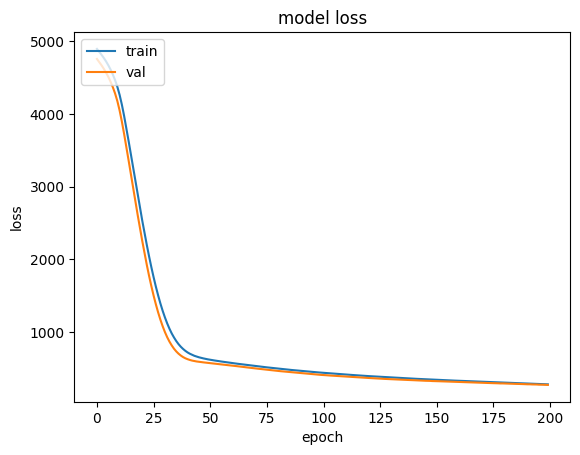

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### Questions

1. What preprocessing techniques did you use? Why?
   - OrdinalEncoders for each non numerical column. I did this because the data was not prepared for model processing.
2. Describe the fine-tuning process and how you reached your model architecture.
   - I tried several different models with different number of layers and neurons. Several ideas were taken from lab assignments. I evaluated model, it gave me satisfying results.


# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

In [25]:
import pandas as pd
import os


def split_class(number):
    return list(map(int, list(str(number))))


def split_one_hot(digit):
    return [1 if digit == i else 0 for i in range(10)]

labels = []
for i in range(10):
    labels.append(f"first{i}")

for i in range(10):
    labels.append(f"mid{i}")

for i in range(10):
    labels.append(f"last{i}")

def parse_dataset(id):
    d = []
    for classname in os.listdir(os.sep.join(['triple_mnist', id])):
        for filename in os.listdir(os.sep.join(['triple_mnist', id, classname])):
            classes = list(map(split_one_hot, split_class(classname)))
            classes = [item for sublist in classes for item in sublist]
            line = {
                'class': classes,
                'filename': filename,
                'path': os.sep.join(['triple_mnist', id, classname, filename]),
            }

            for lbl, cls in zip(labels, classes):
                line[lbl] = cls

            d.append(line)

    return pd.DataFrame(d)


traindf = parse_dataset('train')
testdf = parse_dataset('test')
validatedf = parse_dataset('val')


In [26]:
traindf.head()

,class,filename,path,first0,first1,first2,first3,first4,first5,first6,...,last0,last1,last2,last3,last4,last5,last6,last7,last8,last9
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0_000.png,triple_mnist\train\000\0_000.png,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",10_000.png,triple_mnist\train\000\10_000.png,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",11_000.png,triple_mnist\train\000\11_000.png,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",12_000.png,triple_mnist\train\000\12_000.png,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",13_000.png,triple_mnist\train\000\13_000.png,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
from keras.preprocessing.image import ImageDataGenerator
columns = labels


train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=None,
    x_col="path",
    y_col=columns,
    class_mode="raw",
    target_size=(84, 84),
    batch_size=16,
    color_mode='grayscale'
)

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory=None,
    x_col="path",
    y_col=columns,
    class_mode="raw",
    target_size=(84, 84),
    batch_size=16,
    color_mode='grayscale'
)

val_datagen = ImageDataGenerator()

val_generator = val_datagen.flow_from_dataframe(
    dataframe=validatedf,
    directory=None,
    x_col="path",
    y_col=columns,
    class_mode="raw",
    target_size=(84, 84),
    batch_size=16,
    color_mode='grayscale'
)


Found 64000 validated image filenames.
Found 20000 validated image filenames.
Found 16000 validated image filenames.


In [58]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Sequential

ann = Sequential(layers=[
    Input((84, 84, 1)),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(30, activation='linear')
])

ann.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])

history = ann.fit(train_generator, epochs=10,
                  validation_data=val_generator)


Epoch 1/10
4000/4000 [==============================] - 26s 6ms/step - loss: 24.2390 - accuracy: 0.0418 - val_loss: 24.1946 - val_accuracy: 0.0388
Epoch 2/10
4000/4000 [==============================] - 26s 6ms/step - loss: 24.2794 - accuracy: 0.0491 - val_loss: 24.9464 - val_accuracy: 0.0434
Epoch 3/10
4000/4000 [==============================] - 26s 7ms/step - loss: 24.3942 - accuracy: 0.0760 - val_loss: 23.0702 - val_accuracy: 0.0630
Epoch 4/10
4000/4000 [==============================] - 26s 6ms/step - loss: 24.1957 - accuracy: 0.0630 - val_loss: 22.7165 - val_accuracy: 0.0056
Epoch 5/10
4000/4000 [==============================] - 26s 6ms/step - loss: 24.7382 - accuracy: 0.0039 - val_loss: 24.6860 - val_accuracy: 0.0066
Epoch 6/10
4000/4000 [==============================] - 26s 7ms/step - loss: 24.5421 - accuracy: 0.0648 - val_loss: 23.0084 - val_accuracy: 0.0523
Epoch 7/10
4000/4000 [==============================] - 26s 6ms/step - loss: 24.4335 - accuracy: 0.0637 - val_loss: 25

In [59]:
# save ann
ann.save('ann.h5')

In [55]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Activation
from keras.models import Sequential
from keras.losses import BinaryCrossentropy

model = Sequential(
    [
        Input(shape=(84, 84, 1)),
        Conv2D(16, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512),
        BatchNormalization(),
        Activation('relu'),
        Dense(256),
        Dense(100),
        Dense(30, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss=BinaryCrossentropy(
    from_logits=False), metrics=['accuracy'])

model.fit(train_generator, epochs=20, validation_data=val_generator)


Epoch 1/20
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0490 - accuracy: 0.3378 - val_loss: 0.0616 - val_accuracy: 0.3392
Epoch 2/20
4000/4000 [==============================] - 39s 10ms/step - loss: 0.0166 - accuracy: 0.3444 - val_loss: 0.0168 - val_accuracy: 0.2691
Epoch 3/20
4000/4000 [==============================] - 39s 10ms/step - loss: 0.0118 - accuracy: 0.3333 - val_loss: 0.0150 - val_accuracy: 0.3237
Epoch 4/20
4000/4000 [==============================] - 39s 10ms/step - loss: 0.0092 - accuracy: 0.3371 - val_loss: 0.0117 - val_accuracy: 0.3584
Epoch 5/20
4000/4000 [==============================] - 39s 10ms/step - loss: 0.0074 - accuracy: 0.3266 - val_loss: 0.0122 - val_accuracy: 0.3466
Epoch 6/20
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0061 - accuracy: 0.3373 - val_loss: 0.0157 - val_accuracy: 0.3528
Epoch 7/20
4000/4000 [==============================] - 39s 10ms/step - loss: 0.0052 - accuracy: 0.3340 - val_loss: 0.0097 -

In [56]:
score = model.evaluate(test_generator, verbose=1)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.3235499858856201


In [60]:
model.save('cnn.h5')

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [298]:
df = pd.read_csv('loan_data.csv')

df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Questions

1. How did the DT compare to the RF in performance? Why?
   - _Answer_
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
   - _Answer_
3. What is ensemble learning? What are its pros and cons?
   - _Answer_
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
   Which of these categories does RF fall under? - _Answer_


# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [65]:
svhn_data = []

for filename in os.listdir('svhn'):
    pth = os.sep.join(['svhn', filename])
    classname = filename.split(os.sep)[-1].split('_')[0]
    classname = classname.split('.')[0]

    classes = list(map(split_one_hot, split_class(classname)))
    classes = [item for sublist in classes for item in sublist]

    line = {
        'classes': classes,
        'path': pth,
        'filename': filename
    }

    for lbl, cls in zip(labels, classes):
        line[lbl] = cls

    svhn_data.append(line)

svhn_df = pd.DataFrame(svhn_data)
svhn_df.head()


,classes,path,filename,first0,first1,first2,first3,first4,first5,first6,...,last0,last1,last2,last3,last4,last5,last6,last7,last8,last9
0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",svhn\111.png,111.png,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",svhn\113.png,113.png,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",svhn\114.png,114.png,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",svhn\116.png,116.png,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",svhn\120.png,120.png,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [66]:
svhndataset = ImageDataGenerator()

svhn_flow = svhndataset.flow_from_dataframe(
    dataframe=svhn_df,
    directory=None,
    x_col="path",
    y_col=columns,
    class_mode="raw",
    target_size=(84, 84),
    batch_size=16,
    color_mode='grayscale'
)


Found 92 validated image filenames.


In [68]:
score = model.evaluate(svhn_flow, verbose=1)

print('\n', 'Test accuracy:', score[1])


6/6 [==============================] - 1s 119ms/step - loss: 1.8884 - accuracy: 0.0217

 Test accuracy: 0.021739130839705467


### Questions
1. How did your model perform? Why is it better/worse?
    - *Answer*
2. What is domain gap in the context of ML?
    - *Answer*
3. Suggest two ways through which the problem of domain gap can be tackled.
    - *Answer*